# Golden rule approach for savings rate

In [1]:
# load packages
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load data
df = pd.read_excel('simple_golden_rule_pan.xlsx', sheet_name = 'data')
df.head()

,Year,K,Y,L,S_Y,C,k,y,c,Y_growth,k_growth,y_growth,n
0,1960,5.715010e+08,3.068858e+09,1126989,0.199585,2.347940e+09,507.104326,2723.059769,2083.374112,NaN,NaN,NaN,NaN
1,1961,7.257556e+08,3.404180e+09,1160832,0.237045,2.516194e+09,625.202989,2932.534708,2167.577960,0.109266,0.232888,0.076926,0.030030
2,1962,8.176342e+08,3.684846e+09,1196289,0.257089,2.671750e+09,683.475477,3080.230465,2233.364732,0.082447,0.093206,0.050365,0.030544
3,1963,9.187848e+08,3.999487e+09,1233267,0.236907,2.958099e+09,745.000740,3243.001739,2398.587810,0.085388,0.090018,0.052844,0.030911
4,1964,8.378643e+08,4.176750e+09,1271461,0.230943,3.148576e+09,658.977623,3285.000094,2476.344615,0.044321,-0.115467,0.012950,0.030970


## Trend GDP

Hodrick & Prescott filter

In [3]:
# Hodrick and Prescott filter for trend and cycle
df = df.dropna().reset_index(drop=True)
df['cycle_k'], df['trend_k'] = sm.tsa.filters.hpfilter(df['k'], lamb= 1600)
df['cycle_y'], df['trend_y'] = sm.tsa.filters.hpfilter(df['y'], lamb= 1600)
df['cycle_c'], df['trend_c'] = sm.tsa.filters.hpfilter(df['c'], lamb= 1600)
df['cycle_n'], df['trend_n'] = sm.tsa.filters.hpfilter(df['n'], lamb= 1600)

## Steady state

Solow growth model (and a look ahead) -  MIT: http://web.mit.edu/14.451/www/lecturenotes-Ch-2.pdf

Based in the Solow growth model,  the steady state can be defined as:
$$ 0 = sf(k^{*}) - (\delta  + n) k^{*}$$

Equivalently:

$$ \frac{y^{*}}{k^{*}} =  \phi (k^{*}) = \frac{\delta + n}{s} $$

If we solve for $s$:

$$ s = \frac{\delta + n}{ y^{*} / k^{*}} $$


Where:

* $k^{*}$ = = capital stock per capita in steady state
* $k^{*}$ = output per capita in steady state
* $ \delta $ = capital depreciation rate
* $ n $ = population growht rate
* $s$ = savings rate


In [4]:
def savings_rate(delta, n, y, k):
    """
    delta = capital depreciation rate
    n = population growth rate
    y = output per worker, i.e, GDP per capita
    k = capital per worker
    """
    s = (delta + n ) / (y/k)
    return(s)

### Capital depreciation rate in Panamá

Empirical evidence:


"Investment and Capital Stock Depreciation in Panama" by Samuel Mongrut Montalván. This study analyzes the determinants of investment and capital stock depreciation in Panama using data from 1996 to 2013. The study estimates an average capital depreciation rate of ```7.6%``` for all types of assets, with higher rates for machinery and equipment.

"Estimación de la tasa de depreciación de capital para la economía panameña" by Edgar García-Sánchez and Rita G. Martínez-Vergara. This study estimates the capital depreciation rate for Panama using data from the national accounts. The study estimates a capital depreciation rate of around ```5.5%```.

* The previuous range holds true according to PNA Kamps(2004)

* $\delta$ close to 4.4% in OECD: https://www.econstor.eu/bitstream/10419/71091/1/73983858X.pdf

* $\delta$ close to 5% in all countries: https://www.degruyter.com/document/doi/10.1515/roe-2017-0004/html?lang=de

* $\delta$ is 5% in Panama accoirding to IMF: https://www.imf.org/~/media/Files/Publications/CR/2019/cr1912-PanamaSI.ashx

* $\delta + g = $  5% According to Mankiw, Romer and Weil (1992), and given the neglibible value of $g$ in Panama, $\delta$ = 5%


With the evidence from Panamá and the evidence from all countries,  $\delta$ can be in a range from ```4.4%``` to ```7.6%```, where values closer to ```5%``` are more likeley.


In [5]:
# create grid of uniform values for delta
delta_grid = np.linspace(0.044, 0.076, 100)

In [6]:
# descriptive statistics
media = 0.05
maximo = 0.076
minimo = 0.044
desviacion = ((maximo - media) + (media - minimo))/2
print(desviacion)

0.016


In [7]:
#set random seed
import random
random.seed(10)

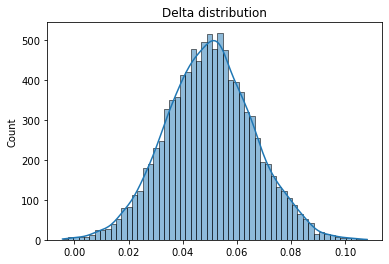

In [8]:
# create random grid of normal distributed values for delta
delta_random = np.random.normal(loc = media, scale = desviacion, size = 10000)
sns.histplot(delta_random, kde = True)
plt.title('Delta distribution')
plt.show()

### Population growth rate
Is calculated above for the last 30 years

In [9]:
# last 10 years population growth
n_historic = df['n'][-10:].mean()
n_historic

0.016658288084756424

In [10]:
# last 30 year trend growth
n_30y = df['trend_n'][-30:].mean()
n_30y

0.018584272151147586

Population growth n according to UN

In [11]:
# load UN data
df_n = pd.read_excel('population_growth_pan.xlsx')
df_n.head()

,year,n_medium,n_high,n_low
0,2022,0.01329,0.01501,0.01158
1,2023,0.01352,0.01541,0.01180
2,2024,0.01310,0.01500,0.01131
3,2025,0.01266,0.01462,0.01075
4,2026,0.01227,0.01436,0.01024


In [12]:
# forecasted population growth scenarios
n_medium = df_n['n_medium'][0:30].mean()
n_high = df_n['n_high'][0:30].mean()
n_low = df_n['n_low'][0:30].mean()
print('Growth central estimation', n_medium)
print('Growth higher estimation', n_high)
print('Growth lower estimation', n_low)

Growth central estimation 0.009270333333333334
Growth higher estimation 0.011687999999999999
Growth lower estimation 0.006973333333333336


### Output and capital
$y^{*}$ and $k^{*}$ are taken as the 2021 trend GDP per capita and Capital per worker in columns ```trend_y``` and ```trend_k```. But 2019 values could hold to drop COVID-19 effect.


### Savings rate

In [13]:
#Rolling 20 and 30 year mean for historic pop growth
df['n_20'] = df['n'].rolling(window=20).mean()
df['n_20'].fillna(method = 'backfill', inplace = True)

df['n_30'] = df['n'].rolling(window=30).mean()
df['n_30'].fillna(method = 'backfill', inplace = True)
df.head()


,Year,K,Y,L,S_Y,C,k,y,c,Y_growth,...,cycle_k,trend_k,cycle_y,trend_y,cycle_c,trend_c,cycle_n,trend_n,n_20,n_30
0,1961,7.257556e+08,3.404180e+09,1160832,0.237045,2.516194e+09,625.202989,2932.534708,2167.577960,0.109266,...,-171.755992,796.958981,-171.884519,3104.419228,-20.033162,2187.611122,-0.001522,0.031551,0.02798,0.026227
1,1962,8.176342e+08,3.684846e+09,1196289,0.257089,2.671750e+09,683.475477,3080.230465,2233.364732,0.082447,...,-159.226540,842.702017,-155.002111,3235.232577,-45.058187,2278.422919,-0.000648,0.031193,0.02798,0.026227
2,1963,9.187848e+08,3.999487e+09,1233267,0.236907,2.958099e+09,745.000740,3243.001739,2398.587810,0.085388,...,-143.336964,888.337704,-122.936759,3365.938498,29.365613,2369.222197,0.000078,0.030833,0.02798,0.026227
3,1964,8.378643e+08,4.176750e+09,1271461,0.230943,3.148576e+09,658.977623,3285.000094,2476.344615,0.044321,...,-274.681558,933.659181,-211.332593,3496.332687,16.376344,2459.968271,0.000499,0.030471,0.02798,0.026227
4,1965,9.508159e+08,4.559341e+09,1310556,0.239947,3.412703e+09,725.505716,3478.936630,2604.011598,0.091600,...,-252.864279,978.369996,-147.197375,3626.134005,53.372784,2550.638814,0.000643,0.030105,0.02798,0.026227


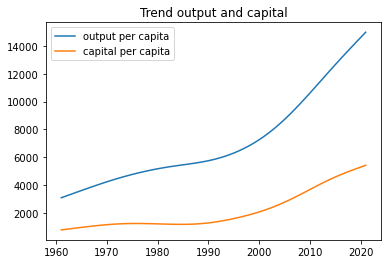

In [14]:
# plot trend gdp per capita and capital per capita
plt.plot(df.Year, df.trend_y, label = 'output per capita')
plt.plot(df.Year, df.trend_k, label = 'capital per capita')
plt.legend()
plt.title('Trend output and capital')
plt.show()

In [15]:
# set level of output and capital as last observation of their trend
y = df['trend_y'].iloc[-1] # 2021
k = df['trend_k'].iloc[-1] # 2021


# or set as 2019 values bypass covid effect
#y = df['trend_y'].iloc[-3] # 2019
#k = df['trend_k'].iloc[-3] # 2019
n = n_30y # last 30 years trend growth
#n = n_medium
s_list = []
# calculate savings rate for values of delta
for i in range(len(delta_grid)):
    s = savings_rate(delta_grid[i], n, y, k)
    s_list.append(s)

In [16]:
print('The golden rule interest rate should be in this range:')
print('min' , np.min(s_list))
print('median' , np.mean(s_list))
print('max' , np.max(s_list))

The golden rule interest rate should be in this range:
min 0.022691927676791866
median 0.02849323893837873
max 0.0342945501999656


In [17]:
# calculate savings rate for random generated values of delta
s_list_random = []
for i in range(len(delta_random)):
    s = savings_rate(delta_random[i], n, y, k)
    s_list_random.append(s)
    
print('The golden rule interest rate should be in this range:')
print('min' , np.min(s_list_random))
print('median' , np.mean(s_list_random))
print('max' , np.max(s_list_random))

The golden rule interest rate should be in this range:
min 0.005154757954084662
median 0.02485555515643187
max 0.045909737084581854


In [18]:
#calculate savings rate for most likeley value of delta
s_likeley = savings_rate(0.05, n, y, k)
s_likeley

0.024867419399886945

In [19]:
#calculate savings rate for historical values
delta_mean = delta_grid.mean()
s_historic = []
for i in range(len(df)):
    n = df.at[i,'n_20']
    y = df.at[i,'trend_y']
    k = df.at[i,'trend_k']
    s = savings_rate(delta_mean, n, y, k)
    s_historic.append(s)

df['s'] = s_historic

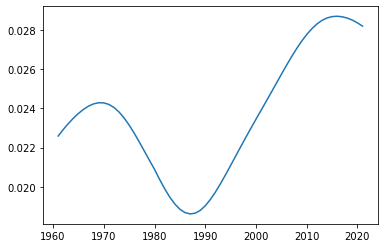

In [20]:
#plot historical savings rate
plt.plot(df.Year, df.s)

## Average valules Solow Model

Estimate savings rate with average values for last 10 years

Average savings rate: 0.02413820360662216


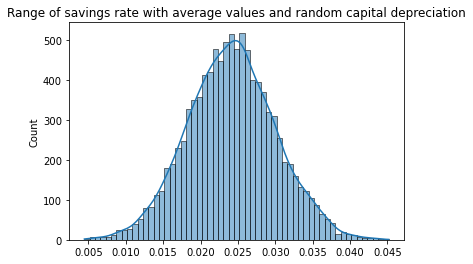

In [21]:
y_average = df['trend_y'].iloc[-10:].mean() # 2011 - 2021
k_average = df['trend_k'].iloc[-10:].mean() # 2011 - 2021
n_average =  df['n'].iloc[-10:].mean() # 2011 - 2021

average_s_random = []

for i in range(len(delta_random)):
    s = savings_rate(delta_random[i], n_average, y_average, k_average)
    average_s_random.append(s)

print('Average savings rate:', np.mean(average_s_random))
sns.histplot(average_s_random, kde = True)
plt.title('Range of savings rate with average values and random capital depreciation')
plt.show()

## Forecasted valules Solow Model

In [22]:
# Hodrick and Prescott filter for trend and cycle
df['cycle_k_growth'], df['trend_k_growth'] = sm.tsa.filters.hpfilter(df['k_growth'], lamb= 1600)
df['cycle_y_growth'], df['trend_y_growth'] = sm.tsa.filters.hpfilter(df['y_growth'], lamb= 1600)

# all history of growth
#y_growth = df['trend_y_growth'].mean()
#k_growth = df['trend_k_growth'].mean()

# take last 20 years of growth
y_growth = df['trend_y_growth'][-20:].mean()
k_growth = df['trend_k_growth'][-20:].mean()

print('Trend output growth:', y_growth)
print('Trend capital growth:', k_growth)

Trend output growth: 0.033700942503984505
Trend capital growth: 0.05256748988450436


Average savings rate: 0.026995509808130445


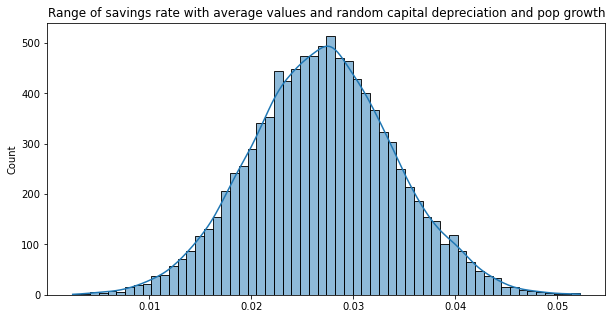

In [23]:
import random
y_21 = df['trend_y'].iloc[-1] # 2021
k_21 = df['trend_k'].iloc[-1] # 2021

y_f10y = y_21 * ((1+y_growth)**(10)) # 10y cumprod
k_f10y = k_21 * ((1+k_growth)**(10)) # 10y cumprod
n_f10y_medium =  df_n['n_medium'][0:10].mean() # 10y forecast average medium
n_f10y_high =  df_n['n_high'][0:10].mean() # 10y forecast average high
n_f10y_low =  df_n['n_low'][0:10].mean() # 10y forecast average low

n_scenarios = [n_f10y_medium, n_f10y_high, n_f10y_low] #3 scenarios of population growth

forecast_s_random = []

for i in range(len(delta_random)):
    n_random = random.sample(n_scenarios, 1)[0] #random sample for population growth
    s = savings_rate(delta_random[i], n_random, y_f10y, k_f10y) #calculate savings rate
    forecast_s_random.append(s) #append

print('Average savings rate:', np.mean(forecast_s_random))
plt.figure(figsize=(10,5))
sns.histplot(forecast_s_random, kde = True)
plt.title('Range of savings rate with average values and random capital depreciation and pop growth')
plt.show()

In [38]:
print('Mean savings rate = ',np.mean(forecast_s_random))
print('+1 std = ',np.mean(forecast_s_random) + np.std(forecast_s_random))
print('-1 std = ',np.mean(forecast_s_random) - + np.std(forecast_s_random))

Mean savings rate =  0.026995509808130445
+1 std =  0.0340508664050441
-1 std =  0.01994015321121679


# Ramsey Cass Koopmans savings rate

According to the RCK model, the savings rate is endogenous and can be determined as follows:

$$ s = \frac{y-c}{y} $$

This translates into a savings rate that is a function of $f(k)$ and $c$, transforming the steady state capital per worker to:
$$ \dot{k} = f(k) - c +(n+g+\delta)k $$
where $g$ stands for the constant growth rate of tecnology, $n$ the population growth rate and $\delta$ the capital depreciation rate.

But if we assume that the consumption and product are in their steady state, we can derive the savings rate as follows:

$$ \dot{s} = \frac{\dot{y}-\dot{c}}{\dot{y}} $$


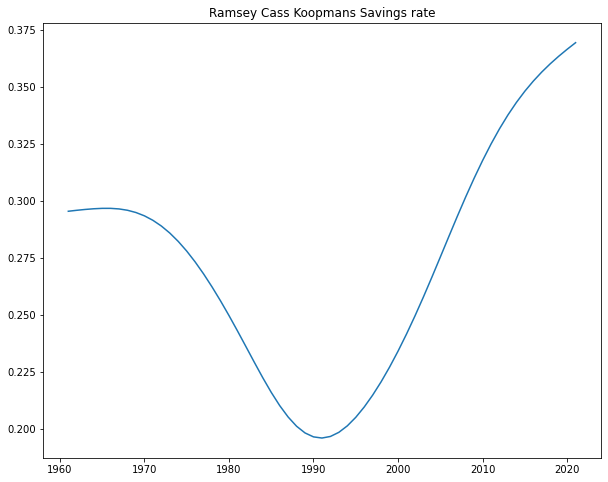

In [24]:
df['s_dot'] = (df['trend_y'] - df['trend_c'])/df['trend_y']
plt.figure(figsize=(10,8))
plt.plot(df.Year, df.s_dot)
plt.title('Ramsey Cass Koopmans Savings rate')
plt.show()

This is the savings rate in the steady state, not the interest rate.

### Endogenous Interest rate in RCK

In [25]:
# Load Penn World Table data
df_pwt = pd.read_excel('pwt1001.xlsx', sheet_name = 'Data')
df_pwt.head()

,countrycode,country,currency_unit,year,rgdpe,rgdpo,pop,emp,avh,emp x avh,...,csh_x,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_n,pl_k
0,ABW,Aruba,Aruban Guilder,1950,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ABW,Aruba,Aruban Guilder,1951,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ABW,Aruba,Aruban Guilder,1952,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ABW,Aruba,Aruban Guilder,1953,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ABW,Aruba,Aruban Guilder,1954,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
# Filter for Panama
df_pan = df_pwt[df_pwt['country'] == 'Panama']
df_pan.head()

,countrycode,country,currency_unit,year,rgdpe,rgdpo,pop,emp,avh,emp x avh,...,csh_x,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_n,pl_k
9240,PAN,Panama,Balboa,1950,2078.012207,1921.755249,0.885651,NaN,NaN,NaN,...,0.106793,-0.400704,0.084311,0.153162,0.131216,0.080722,0.102351,0.090788,0.120985,NaN
9241,PAN,Panama,Balboa,1951,1996.005859,1901.684326,0.908532,NaN,NaN,NaN,...,0.112405,-0.430872,0.064015,0.166374,0.139399,0.074093,0.101690,0.093115,0.132908,NaN
9242,PAN,Panama,Balboa,1952,2187.624023,2050.210449,0.932863,NaN,NaN,NaN,...,0.098670,-0.434843,0.058567,0.156638,0.137192,0.083935,0.108251,0.093171,0.132033,NaN
9243,PAN,Panama,Balboa,1953,2315.174561,2193.881836,0.954802,NaN,NaN,NaN,...,0.091398,-0.359453,0.079405,0.156600,0.137115,0.078497,0.115268,0.100838,0.130280,NaN
9244,PAN,Panama,Balboa,1954,2486.115234,2331.908936,0.977504,NaN,NaN,NaN,...,0.081896,-0.350062,0.066534,0.152390,0.129525,0.080320,0.122086,0.097309,0.121526,NaN


important columns:
* rgdpo = Output-side real GDP at chained PPPs (in mil. 2017USD)
* pop= Population (in millions)
* emp = Number of persons engaged (in millions)
* ccon	 = Real consumption of households and government, at current PPPs (in mil. 2017USD)
* cn = Capital stock at current PPPs (in mil. 2017USD)
* ctfp = TFP level at current PPPs (USA=1)
* cwtfp =  TFP of workers at current PPPs (USA=1)

In [27]:
# Use only relevant columns
df_pan = df_pan[['year','rgdpo', 'pop','emp' ,'ccon', 'cn', 'ctfp', 'cwtfp']]
df_pan = df_pan[~df_pan['ctfp'].isna()]
df_pan.reset_index(inplace = True, drop = True)
df_pan.head()

,year,rgdpo,pop,emp,ccon,cn,ctfp,cwtfp
0,1969,6775.033691,1.477365,0.4203,6192.045410,9836.221680,0.937487,1.025832
1,1970,8086.922852,1.519285,0.4343,6954.911621,11342.275391,1.044254,1.129560
2,1971,8992.350586,1.563093,0.4413,7487.617676,12949.618164,1.071301,1.153605
3,1972,9551.375977,1.607796,0.4554,7760.539551,14960.575195,1.027299,1.102712
4,1973,10033.276367,1.653212,0.4641,7904.164551,16842.597656,0.978292,1.047618


Get rates of growth:

* n is the rate of population growth
* g is the rate of technological progress

In [28]:
# Calculate growth rate for columns
df_pan['pop_pct'] = df_pan['pop'].pct_change()
df_pan['ctfp_pct'] = df_pan['ctfp'].pct_change()
df_pan['cwtfp_pct'] = df_pan['cwtfp'].pct_change()

# drop NaNs generated from growth rate calculation
df_pan.dropna(inplace = True)
df_pan.reset_index(inplace = True, drop = True)

# Calculate trend and cycle for population and technology
df_pan['cycle_pop'], df_pan['trend_pop'] = sm.tsa.filters.hpfilter(df_pan['pop_pct'], 100)
df_pan['cycle_ctfp'], df_pan['trend_ctfp'] = sm.tsa.filters.hpfilter(df_pan['ctfp_pct'], 100)
df_pan['cycle_cwtfp'], df_pan['trend_cwtfp'] = sm.tsa.filters.hpfilter(df_pan['cwtfp_pct'], 100)

# long term trend growth rates for population and technology
n = df_pan['trend_pop'].mean()
g = df_pan['trend_ctfp'].mean()
gw = df_pan['trend_cwtfp'].mean()
df_pan['min_r'] = df_pan['trend_pop'] + df_pan['trend_ctfp']
print(n, 'Population growth rate')
print(g, 'Technology growth rate, measured by TFP')

0.021347081796005276 Population growth rate
-0.0019058575789706283 Technology growth rate, measured by TFP


Real interest rate should be at least the sum of the population growth rate and the technology growth rate

In [29]:
# Estimate minimum floor for interest rate
min_rate = n+g
print('The interest rate should be at least:', min_rate)

The interest rate should be at least: 0.019441224217034647


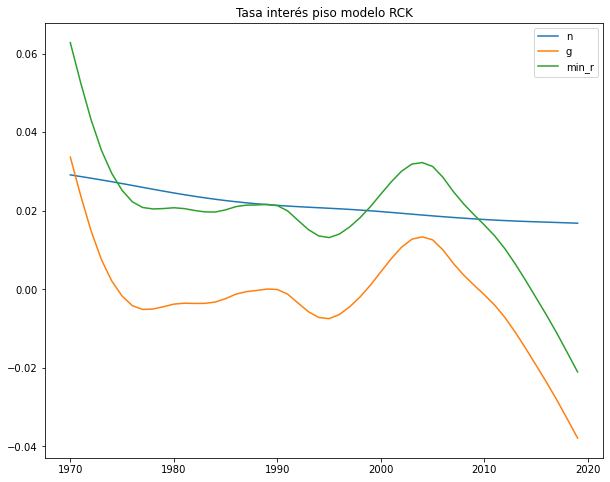

In [30]:
# Plot floor across years
plt.figure(figsize = (10,8))
plt.plot(df_pan.year, df_pan.trend_pop, label = 'n')
plt.plot(df_pan.year, df_pan.trend_ctfp, label = 'g')
plt.plot(df_pan.year, df_pan.min_r, label = 'min_r')
plt.legend()
plt.title('Tasa interés piso modelo RCK')
plt.show()

# BanRep Replica

The capital stock should converge to the steady state, when the maringal productivity of capital minus the capital depreciation tend to $\rho + \theta g_{A} $, where $\rho$, $\theta$ and $g_{A}$ are the subjective rate of discount, the risk aversion and the technology growht (measured by TFP)

The intertemporal inequality  states that:
$$\rho + \theta g_{A} > n + g_{A}$$



* $\rho = 3.61$ found in 2020:  https://journals.sagepub.com/doi/pdf/10.1177/1091142119890369

* $\theta= 0.18$ found in FED paper in 2014: https://files.stlouisfed.org/files/htdocs/wp/2014/2014-005.pdf

* $g_{A} = -0.001$ found in PWT TFP change 

In [31]:
# Estimate probable value of interest rate based on given values
rho = 0.0361
theta = 0.18
r_ss = rho + (theta * g)
print('Interest rate of steady state should be at least = ',r_ss)

Interest rate of steady state should be at least =  0.035756945635785284


# Long run economic growth

In [32]:
df.head()

,Year,K,Y,L,S_Y,C,k,y,c,Y_growth,...,cycle_n,trend_n,n_20,n_30,s,cycle_k_growth,trend_k_growth,cycle_y_growth,trend_y_growth,s_dot
0,1961,7.257556e+08,3.404180e+09,1160832,0.237045,2.516194e+09,625.202989,2932.534708,2167.577960,0.109266,...,-0.001522,0.031551,0.02798,0.026227,0.022586,0.117241,0.115647,0.020155,0.056771,0.295324
1,1962,8.176342e+08,3.684846e+09,1196289,0.257089,2.671750e+09,683.475477,3080.230465,2233.364732,0.082447,...,-0.000648,0.031193,0.02798,0.026227,0.022917,-0.015732,0.108938,-0.003861,0.054226,0.295747
2,1963,9.187848e+08,3.999487e+09,1233267,0.236907,2.958099e+09,745.000740,3243.001739,2398.587810,0.085388,...,0.000078,0.030833,0.02798,0.026227,0.023220,-0.012283,0.102302,0.001151,0.051693,0.296118
3,1964,8.378643e+08,4.176750e+09,1271461,0.230943,3.148576e+09,658.977623,3285.000094,2476.344615,0.044321,...,0.000499,0.030471,0.02798,0.026227,0.023494,-0.211269,0.095802,-0.036232,0.049182,0.296415
4,1965,9.508159e+08,4.559341e+09,1310556,0.239947,3.412703e+09,725.505716,3478.936630,2604.011598,0.091600,...,0.000643,0.030105,0.02798,0.026227,0.023738,0.011461,0.089495,0.012331,0.046706,0.296596


In [33]:
# Trend economic growth
df['cycle_growth'], df['trend_growth'] = sm.tsa.filters.hpfilter(df['Y_growth'], lamb = 1600)

In [34]:
# Long run economic growth
df['trend_growth'].mean()

0.05153241121457955

In [35]:
# Last 30 years long run growth
df['trend_growth'].iloc[-30:].mean()

0.04960773047121547

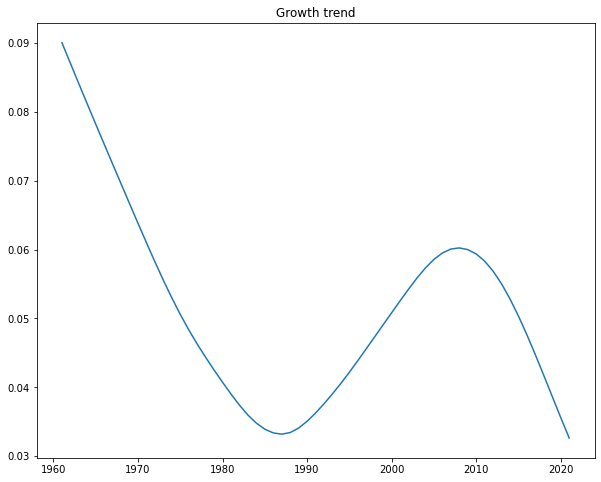

In [36]:
# Plot long ron growth
plt.figure(figsize=(10,8))
plt.plot(df.Year, df.trend_growth)
plt.title('Growth trend')
plt.show()

The findings are the following:

* Long run economic growth = ```5.15%```

* Last 30 years trend growth = ```4.96%```

* Population growth = ```1.85%```

* Solow-Swan model interest rate range given a capital depreciation rate range = ```2.26%``` - ```3.42%```

* Solow-Swan model interest rate range given a capital depreciation rate random range = ```0.3%``` - ```4.6%```

* Solo-Swan model interes rate range given a capital depreciation rate random range and the forecasted growth of capital and output based on observed trend growth levels, and population scenarios from the UN = ```1.99%``` - ```3.40%``` and mean = ```2.70%```

* Minimum rate according to Ramsey-Cass-Koopmans model with external $\rho$ and $\theta$ = ```3.57%```

* The propable values are in a range from  ```2.26%```  to ```3.57%``` with a tendency to ```2.48%``` if the Solow-Swan Model evidence is prioritized. (when capital depreciation is ```5%```)





